In [0]:
!pip install --upgrade -q gspread

In [9]:
!pip install stop_words

  Running setup.py bdist_wheel for stop-words ... - done
  Stored in directory: /content/.cache/pip/wheels/d3/60/7e/bc83ee0496b334c47a572d498f029dc7be23a96a7166187885
Successfully built stop-words


In [50]:
!pip install wordcloud

    100% |████████████████████████████████| 174kB 4.3MB/s 
  Running setup.py bdist_wheel for wordcloud ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/3e/40/7c/d768cb5022ec6aa5611728339886bc1e9f0b629547f39237fd
Successfully built wordcloud


In [0]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import gensim
from gensim import corpora, models
from gensim.utils import smart_open, simple_preprocess
from gensim.corpora.wikicorpus import _extract_pages, filter_wiki
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from stop_words import get_stop_words
from nltk.stem import WordNetLemmatizer
import random
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import time
import pickle
import itertools

import nltk
import csv
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [12]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

Naked_Palette_Collection = gc.open('Naked_Palette_Collection.xlsx').sheet1

# get_all_values gives a list of rows.
rows = Naked_Palette_Collection.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
Naked_Palette_Collection=pd.DataFrame.from_records(rows)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
Naked_Palette_Collection.columns = ['rating', 'review']
Naked_Palette_Collection['review']

0        I'm completely in love with this pallete!! Gre...
1        I bought this pallet after having a mini lesso...
2        I don't think there is one color in this palet...
3        So worth the money. Gorgeous colors. Applies l...
4        I got this palette as a gift because I have be...
5        I was looking for a neutral palette for daytim...
6        I always use a product for months before I wri...
7        I expected this palette to be great, but not t...
8        I totally love this palette. I use it everyday...
9        I wasn't in love with the last two naked palet...
10       Had the last one and liked it a lot. Love this...
11       I've always hoped a Naked collection would com...
12       I absolutely love this palette. It's what conv...
13       I love makeup - that works. This does everythi...
14       If you love shimmery rose gold colors it's a m...
15       Does anybody *not* love this?? The colors are ...
16       This palette is better than you think it is. Y.

In [46]:
type(Naked_Palette_Collection['review'][Naked_Palette_Collection.rating == '5'])

pandas.core.series.Series

In [44]:
type(Naked_Palette_Collection['review'])

pandas.core.series.Series

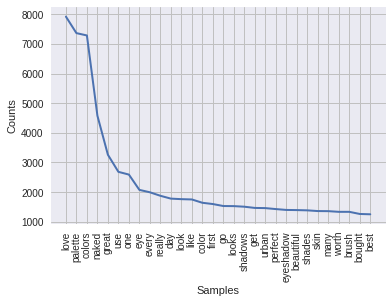

In [47]:
pos=[]

    
for line in Naked_Palette_Collection['review'][Naked_Palette_Collection.rating == '5']:

  pos.append(line)
                
stop = set(stopwords.words('english'))
new = [i for i in str(pos).lower().split() if i not in stop and i.isalpha() ]
Freq_dist_nltk=nltk.FreqDist(new)
Freq_dist_nltk.plot(30,cumulative = False)

neg=[]

    
for line in Naked_Palette_Collection['review'][Naked_Palette_Collection.rating == '1']:

  neg.append(line)
                
stop = set(stopwords.words('english'))
new = [i for i in str(neg).lower().split() if i not in stop and i.isalpha() ]
Freq_dist_nltk=nltk.FreqDist(new)
Freq_dist_nltk.plot(30,cumulative = False)

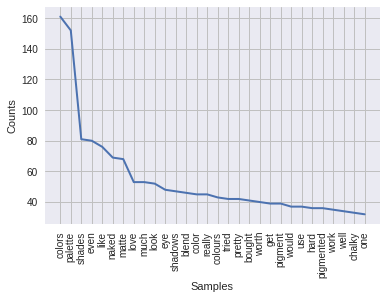

In [48]:
neg=[]

    
for line in Naked_Palette_Collection['review'][Naked_Palette_Collection.rating == '1']:

  neg.append(line)
                
stop = set(stopwords.words('english'))
new = [i for i in str(neg).lower().split() if i not in stop and i.isalpha() ]
Freq_dist_nltk=nltk.FreqDist(new)
Freq_dist_nltk.plot(30,cumulative = False)

Positive words


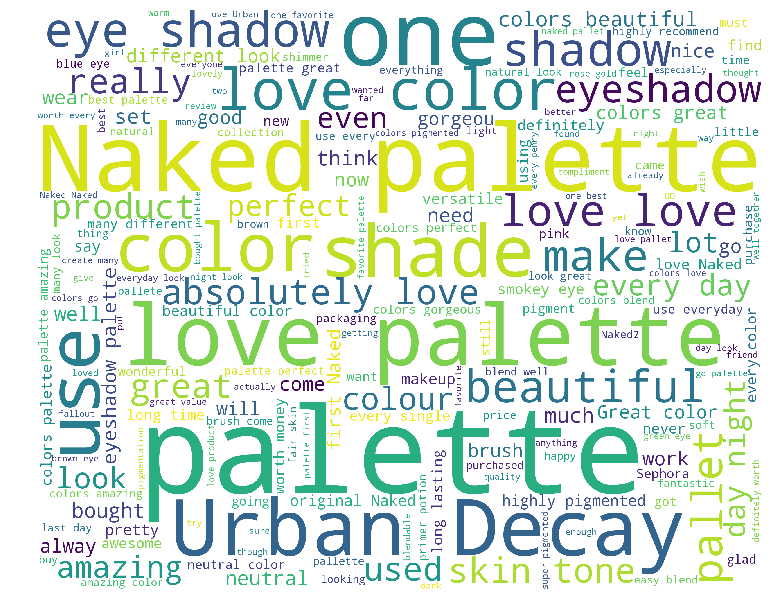

Negative words


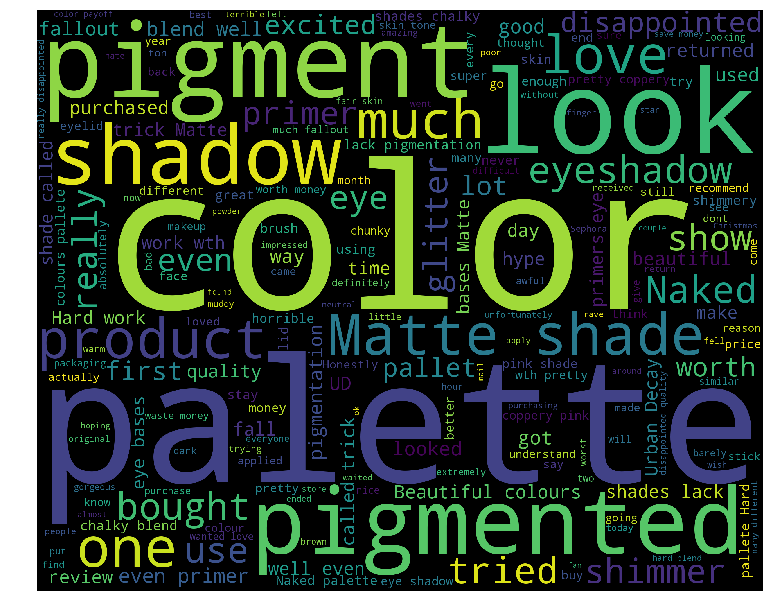

In [57]:
pos = Naked_Palette_Collection[ Naked_Palette_Collection['rating'] == '5']
pos = pos['review']
neg = Naked_Palette_Collection[ Naked_Palette_Collection['rating'] == '1']
neg = neg['review']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(pos,'white')
print("Negative words")
wordcloud_draw(neg)